In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


In [186]:
#1 read data into pandas dataframe.
df = pd.read_csv("student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [187]:
#2 Remove the G1 and G2 and stuff i wont use.
df = df.drop(columns=['G1', 'G2','address','famsize','Pstatus','nursery','paid','guardian','Fjob','Mjob','Fedu','Medu'])

# MEAN AND MEDIAN

In [188]:
school_counts = df['school'].value_counts()
print(school_counts)

school
GP    349
MS     46
Name: count, dtype: int64


In [189]:
df_mean = df['G3'].mean()
df_median = df['G3'].median()
#Find the median and Mean of G3
print('The Median Value of G3:',df_median)
print('The Mean Value of G3:',df_mean)

The Median Value of G3: 11.0
The Mean Value of G3: 10.415189873417722


In [190]:
# Mean G3 by school
school_mean = df.groupby("school")["G3"].mean()
# Median G3 by school
school_median = df.groupby("school")["G3"].median()
# Display mean and median G3 scores by school
print("Mean G3 scores by school:",school_mean)
print("Median G3 scores by school:",school_median)

Mean G3 scores by school: school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64
Median G3 scores by school: school
GP    11.0
MS    10.0
Name: G3, dtype: float64


# BOX PLOT(S)

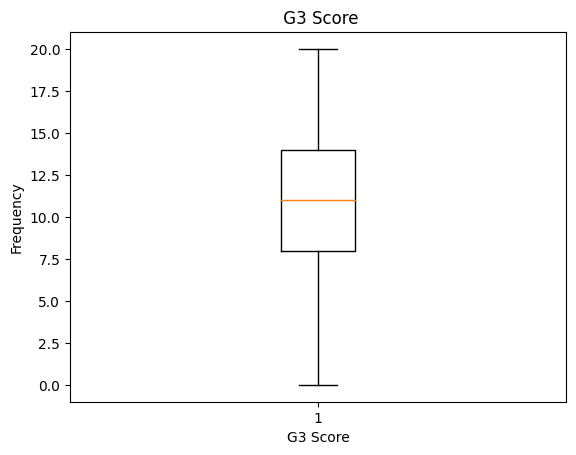

In [191]:
plt.boxplot(df['G3'])
plt.xlabel("G3 Score")
plt.ylabel("Frequency")
plt.title(" G3 Score")
plt.show()

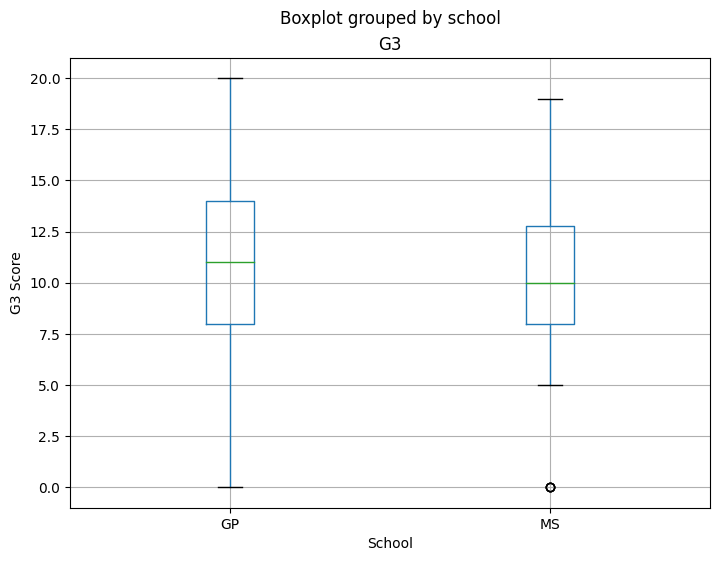

In [192]:
df.boxplot(column="G3", by="school", figsize=(8, 6))
plt.xlabel("School")
plt.ylabel("G3 Score")
plt.show()

# BAR CHART

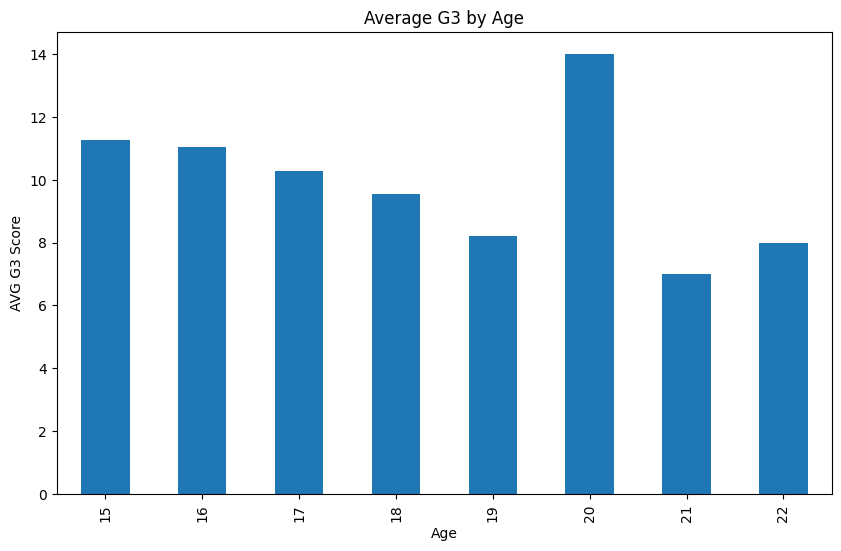

In [193]:
avg_age = df.groupby("age")["G3"].mean()
avg_age.plot(kind="bar", figsize=(10, 6))
plt.title("Average G3 by Age")
plt.xlabel("Age")
plt.ylabel("AVG G3 Score")
plt.show()

#PIE CHARTS

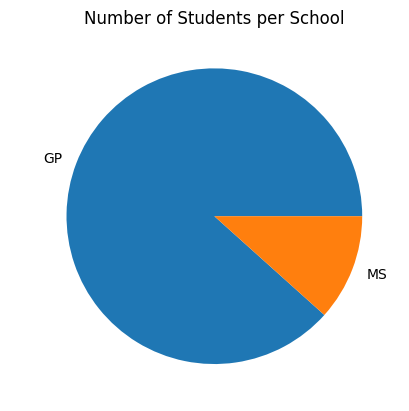

In [194]:
student_count = df["school"].value_counts()
student_count.plot(kind="pie")
plt.title("Number of Students per School")
plt.ylabel(" ")
plt.show()

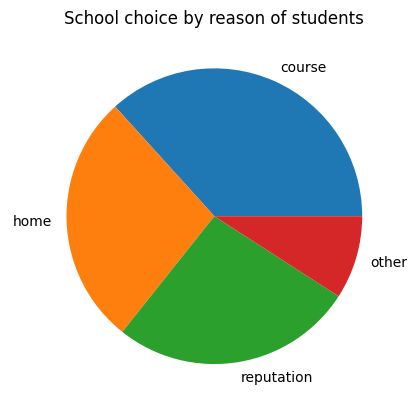

In [195]:
reason = df["reason"].value_counts()
reason.plot(kind="pie")
plt.title("School choice by reason of students")
plt.ylabel(" ")
plt.show()

In [196]:
df.head()

,school,sex,age,reason,traveltime,studytime,failures,schoolsup,famsup,activities,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,course,2,2,0,yes,no,no,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,course,1,2,0,no,yes,no,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,other,1,2,3,yes,no,no,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,home,1,3,0,no,yes,yes,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,home,1,2,0,no,yes,no,...,no,no,4,3,2,1,2,5,4,10


In [197]:
df['schoolsup'] = df['schoolsup'].replace({'yes':1,'no':0})
df['famsup'] = df['famsup'].replace({'yes':1,'no':0})
df['romantic'] = df['romantic'].replace({'yes':1,'no':0})
df['higher'] = df['higher'].replace({'yes':1,'no':0})


In [198]:
df

,school,sex,age,reason,traveltime,studytime,failures,schoolsup,famsup,activities,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,course,2,2,0,1,0,no,...,no,0,4,3,4,1,1,3,6,6
1,GP,F,17,course,1,2,0,0,1,no,...,yes,0,5,3,3,1,1,3,4,6
2,GP,F,15,other,1,2,3,1,0,no,...,yes,0,4,3,2,2,3,3,10,10
3,GP,F,15,home,1,3,0,0,1,yes,...,yes,1,3,2,2,1,1,5,2,15
4,GP,F,16,home,1,2,0,0,1,no,...,no,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,course,1,2,2,0,1,no,...,no,0,5,5,4,4,5,4,11,9
391,MS,M,17,course,2,1,0,0,0,no,...,yes,0,2,4,5,3,4,2,3,16
392,MS,M,21,course,1,1,3,0,0,no,...,no,0,5,5,3,3,3,3,3,7
393,MS,M,18,course,3,1,0,0,0,no,...,yes,0,4,4,1,3,4,5,0,10


# MULTIPLE REGRESSION(s)

In [199]:
predictor_set1 = ["age", "higher", "studytime","absences", "famsup"]
predictor_set2 = ["age", "higher", "studytime","absences", "romantic"]
predictor_set3 = ["age", "higher", "studytime","absences", "Walc"]
predictor_set4 = ["age", "higher", "studytime","absences", "schoolsup"]
data_set1 = df[predictor_set1].values
data_set2 = df[predictor_set2].values
data_set3 = df[predictor_set3].values
data_set4 = df[predictor_set4].values
y = df['G3'].values
LinReg = LinearRegression()

In [200]:
x_1 = scale(data_set1)
x_2 = scale(data_set2)
x_3 = scale(data_set3)
x_4 = scale(data_set4)

#  Regression model 1 Emphasis: Family support

In [201]:
# Data det 1 : famsup
LinReg.fit(x_1,y)
print(LinReg.score(x_1,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.06723210277818725
10.415189873417722
[-0.71738132  0.67519274  0.40917381  0.35606967 -0.41620332]




```
regression score?
0.067
how valuable you think it is in predicting G3?

The bases for model 1 was to take into account family support
in comparison with attendance and study time. a score of .06
says we may need to review.

variable coefficients
age=-0.717
higher=0.675  
studytime=0.409  
absences=0.356
famsup=-0.416

Y-intercept of your equation line?
10.415
```



#  Regression model 2 Emphasis: Romantic

In [202]:
# Data det 2 : famsup
LinReg.fit(x_2,y)
print(LinReg.score(x_2,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.0712908147288892
10.415189873417722
[-0.59534525  0.61003907  0.39070554  0.39860132 -0.51415931]




```
regression score?
0.071
how valuable you think it is in predicting G3?

Model 2 leans toward the idea of how effective
is someone using their time. Are you attending class,
are you studying enought? how often are you coming to class? and does a relationship help or hurt? This model may be slightly better than model 1.

variable coefficients
age=-0.595  
higher=0.610  
studytime=0.39  
absences=0.398
romantic=-0.514

Y-intercept of your equation line?
10.41
```



#  Regression model 3 Emphasis: Alcohol on weekends

In [203]:
# Data det 3 : famsup
LinReg.fit(x_3,y)
print(LinReg.score(x_3,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.05947818796981974
10.415189873417722
[-0.65400112  0.65233098  0.33764221  0.33665133 -0.05569646]




```
regression score?
0.059
how valuable you think it is in predicting G3?

Model 3 is taking into account what a student may
do on the weekends. The main question is also will
alcohol consumption change study time or Mon - Fri
class work.

variable coefficients
age=-0.654
higher=0.652
studytime=0.337  
absences=0.336
walc=-0.055

Y-intercept of your equation line?
10.415
```



#  Regression model 4 Emphasis: School support

In [204]:
# Data det 4 : famsup
LinReg.fit(x_4,y)
print(LinReg.score(x_4,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.07789585222457573
10.415189873417724
[-0.83033484  0.65143189  0.3781354   0.37700325 -0.64616207]




```
regression score?
0.077
how valuable you think it is in predicting G3?

Model 3 is about whether the student is getting support from the school and how well that effects
the rest overall. I do feel this model is slightly
better than 1 and 2

variable coefficients
age-0.83033484  
higher=0.651  
studytime=0.378   
absences=0.377
schoolsup=-0.646

Y-intercept of your equation line?
10.415
```



# Remove Outliers

In [205]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [208]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3 - q1
output = df[(df["age"] >= q1 - 1.5 * iqr) & (df["age"] <= q3 + 1.5 * iqr)]
print("Quartile 1:", q1)
print("Quartile 3:", q3)
print("inner quartile:", iqr)
print()
print("output:", output)

Quartile 1: 16.0
Quartile 3: 18.0
inner quartile: 2.0

output:     school sex  age  reason  traveltime  studytime  failures  schoolsup  \
0       GP   F   18  course           2          2         0          1   
1       GP   F   17  course           1          2         0          0   
2       GP   F   15   other           1          2         3          1   
3       GP   F   15    home           1          3         0          0   
4       GP   F   16    home           1          2         0          0   
..     ...  ..  ...     ...         ...        ...       ...        ...   
390     MS   M   20  course           1          2         2          0   
391     MS   M   17  course           2          1         0          0   
392     MS   M   21  course           1          1         3          0   
393     MS   M   18  course           3          1         0          0   
394     MS   M   19  course           1          1         0          0   

     famsup activities  ...  interne



```
The analysis and exploration of the student data
began with column removal began with G1 and G2.
mean and median G3 scores were computed by school and visualized using box plots.
Additionally, pie charts were generated to illustrate the distribution of students across schools and the factors influencing school selection.

A bar chart was crafted to depict the average G3 score across various student age groups.

Transitioning to regression analysis.

 The predictors used were a combination of age, study time, absences,
 romantic relationships, family support and school support.

 The regression model yeiled performance scores for each model.
 These include intercept, and coefficient values for each predictor variable.
 the model exhibited poor predictive power for G3, suggesting a need for further exploration of the data.

```

